# 미니 프로젝트 : 택시요금 데이터 다루기

### 데이터 불러오기 확인

In [16]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
data = pd.read_csv('data/trip.csv')

In [18]:
data.head()

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
0,Pamela Duffy,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,Debit Card,6,3.34,13.0,2.76,0.0
1,Michelle Foster,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,Debit Card,1,1.80,16.0,4.00,0.0
2,Tina Combs,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,Debit Card,1,1.00,6.5,1.45,0.0
3,Anthony Ray,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,Cash,1,3.70,20.5,6.39,0.0
4,Brianna Johnson,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,Debit Card,1,4.37,16.5,0.00,0.0


- info() 메소드를 사용하여 데이터 컬럼명과 자료형 확인

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22701 entries, 0 to 22700
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   passenger_name         22701 non-null  object 
 1   tpep_pickup_datetime   22701 non-null  object 
 2   tpep_dropoff_datetime  22701 non-null  object 
 3   payment_method         22701 non-null  object 
 4   passenger_count        22701 non-null  int64  
 5   trip_distance          22701 non-null  float64
 6   fare_amount            22698 non-null  float64
 7   tip_amount             22701 non-null  float64
 8   tolls_amount           22701 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 1.6+ MB


- describe() 메서드를 사용하여 데이터 컬럼별 통계량 확인

In [20]:
data.describe()

,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
count,22701.000000,22701.000000,22698.000000,22701.000000,22701.000000
mean,1.643584,2.913400,13.024009,1.835745,0.312514
std,1.304942,3.653023,13.240074,2.800537,1.399153
min,0.000000,0.000000,-120.000000,0.000000,0.000000
25%,1.000000,0.990000,6.500000,0.000000,0.000000
50%,1.000000,1.610000,9.500000,1.350000,0.000000
75%,2.000000,3.060000,14.500000,2.450000,0.000000
max,36.000000,33.960000,999.990000,200.000000,19.100000


### 중복 데이터 확인

- 중복 데이터 확인

In [21]:
data[ data.duplicated() ]

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
17,Sarah Gross,08/15/2017 7:48:08 PM,08/15/2017 8:00:37 PM,Cash,1,3.6,12.5,2.85,0.0
204,Lisa Bullock,02/13/2017 4:25:41 PM,02/13/2017 4:55:35 PM,Cash,1,4.2,21.0,0.00,0.0


In [22]:
data[ data['passenger_name']=='Sarah Gross' ]

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
16,Sarah Gross,08/15/2017 7:48:08 PM,08/15/2017 8:00:37 PM,Cash,1,3.6,12.5,2.85,0.0
17,Sarah Gross,08/15/2017 7:48:08 PM,08/15/2017 8:00:37 PM,Cash,1,3.6,12.5,2.85,0.0


In [23]:
data[ data['passenger_name']=='Lisa Bullock' ] 

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
203,Lisa Bullock,02/13/2017 4:25:41 PM,02/13/2017 4:55:35 PM,Cash,1,4.2,21.0,0.0,0.0
204,Lisa Bullock,02/13/2017 4:25:41 PM,02/13/2017 4:55:35 PM,Cash,1,4.2,21.0,0.0,0.0


- 중복 데이터 제거

In [24]:
data = data.drop_duplicates()
data = data.reset_index(drop=True)

In [25]:
data[ data['passenger_name']=='Sarah Gross' ]

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
16,Sarah Gross,08/15/2017 7:48:08 PM,08/15/2017 8:00:37 PM,Cash,1,3.6,12.5,2.85,0.0


In [26]:
data[ data['passenger_name']=='Lisa Bullock' ] 

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
202,Lisa Bullock,02/13/2017 4:25:41 PM,02/13/2017 4:55:35 PM,Cash,1,4.2,21.0,0.0,0.0


### 결측치 확인

- 전체 데이터 대비 결측치의 비율 확인

In [32]:
data.isna().sum() / (data.isna().sum() + data.count()) * 100

passenger_name           0.000000
tpep_pickup_datetime     0.000000
tpep_dropoff_datetime    0.000000
payment_method           0.000000
passenger_count          0.000000
trip_distance            0.000000
fare_amount              0.013216
tip_amount               0.000000
tolls_amount             0.000000
dtype: float64

In [33]:
data.isna().mean() * 100

passenger_name           0.000000
tpep_pickup_datetime     0.000000
tpep_dropoff_datetime    0.000000
payment_method           0.000000
passenger_count          0.000000
trip_distance            0.000000
fare_amount              0.013216
tip_amount               0.000000
tolls_amount             0.000000
dtype: float64

- 결측치 제거

In [34]:
data = data.dropna(axis=0)

In [35]:
data

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
0,Pamela Duffy,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,Debit Card,6,3.34,13.0,2.76,0.00
1,Michelle Foster,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,Debit Card,1,1.80,16.0,4.00,0.00
2,Tina Combs,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,Debit Card,1,1.00,6.5,1.45,0.00
3,Anthony Ray,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,Cash,1,3.70,20.5,6.39,0.00
4,Brianna Johnson,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,Debit Card,1,4.37,16.5,0.00,0.00
...,...,...,...,...,...,...,...,...,...
22694,Austin Johnson,02/24/2017 5:37:23 PM,02/24/2017 5:40:39 PM,Cash,3,0.61,4.0,0.00,0.00
22695,Monique Williams,08/06/2017 4:43:59 PM,08/06/2017 5:24:47 PM,Cash,1,16.71,52.0,14.64,5.76
22696,Drew Graves,09/04/2017 2:54:14 PM,09/04/2017 2:58:22 PM,Debit Card,1,0.42,4.5,0.00,0.00
22697,Jonathan Copeland,07/15/2017 12:56:30 PM,07/15/2017 1:08:26 PM,Debit Card,1,2.36,10.5,1.70,0.00


### passenger_count 컬럼 이상치 제거

- passenger_count 컬럼 값 기준으로 정렬

In [36]:
data['passenger_count'].sort_values()

21752     0
21638     0
21216     0
20310     0
19456     0
         ..
10450     6
5155      6
4314      6
5170      6
63       36
Name: passenger_count, Length: 22696, dtype: int64

- passenger_count 값의 scatter plot 그리기

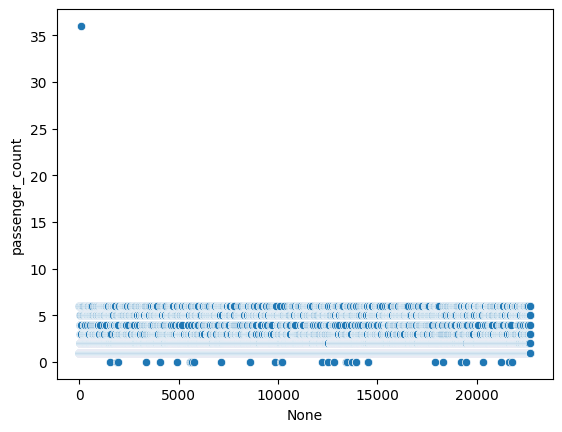

In [38]:
sns.scatterplot(x=data.index, y=data['passenger_count'])
plt.show()

- passenger_count 컬럼의 이상치 제거
    - passenger_count가 6을 초과하는 경우
    - passenger_count가 0인 경우

In [43]:
data = data.loc[(data['passenger_count']<7)&(data['passenger_count']>0) , : ]
data = data.reset_index(drop=True)

In [44]:
data

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
0,Pamela Duffy,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,Debit Card,6,3.34,13.0,2.76,0.00
1,Michelle Foster,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,Debit Card,1,1.80,16.0,4.00,0.00
2,Tina Combs,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,Debit Card,1,1.00,6.5,1.45,0.00
3,Anthony Ray,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,Cash,1,3.70,20.5,6.39,0.00
4,Brianna Johnson,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,Debit Card,1,4.37,16.5,0.00,0.00
...,...,...,...,...,...,...,...,...,...
22657,Austin Johnson,02/24/2017 5:37:23 PM,02/24/2017 5:40:39 PM,Cash,3,0.61,4.0,0.00,0.00
22658,Monique Williams,08/06/2017 4:43:59 PM,08/06/2017 5:24:47 PM,Cash,1,16.71,52.0,14.64,5.76
22659,Drew Graves,09/04/2017 2:54:14 PM,09/04/2017 2:58:22 PM,Debit Card,1,0.42,4.5,0.00,0.00
22660,Jonathan Copeland,07/15/2017 12:56:30 PM,07/15/2017 1:08:26 PM,Debit Card,1,2.36,10.5,1.70,0.00


- passenger_count 컬럼의 scatter plot 다시 그리기

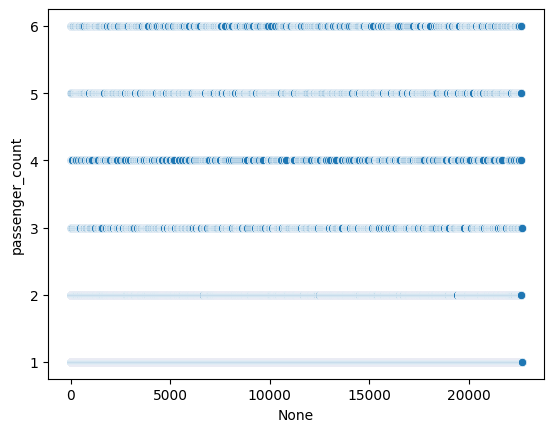

In [45]:
sns.scatterplot(x=data.index, y=data['passenger_count'])
plt.show()

### 수치형 컬럼의 이상치 제거

- trip_distance의 이상치 확인

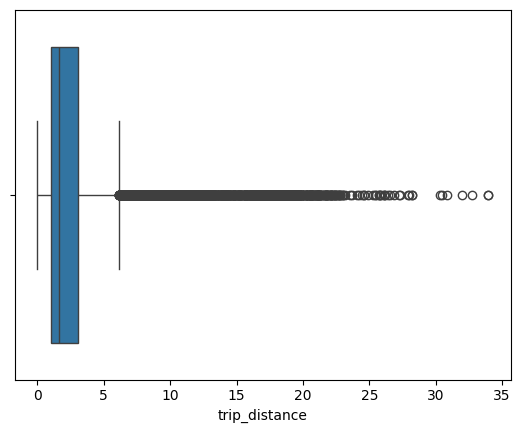

In [49]:
sns.boxplot( data['trip_distance'], orient='h' )
plt.show()

- trip_distance의 이상치 제거

In [50]:
q1 = np.percentile(data['trip_distance'], 25)
q2 = np.percentile(data['trip_distance'], 50)
q3 = np.percentile(data['trip_distance'], 75)
iqr = q3 - q1

lower_bound = q1 - iqr*1.5
higher_bound = q3 + iqr*1.5

data['trip_distance'] = data.loc[ (data['trip_distance']>lower_bound)&(data['trip_distance']<higher_bound) , 'trip_distance' ]
data = data.dropna()

- trip_distance의 히스토그램 그리기

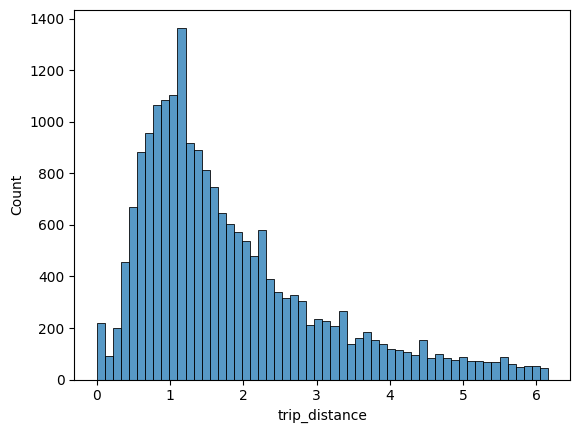

In [52]:
sns.histplot(data, x='trip_distance')
plt.show()

- fare_amount의 이상치 데이터 갯수 확인
    - fare_amount가 0 이하인 경우

In [54]:
(data['fare_amount']<=0).sum()

np.int64(18)

- fare_amount의 이상치 제거

In [55]:
data.loc[ data['fare_amount']<=0 , 'fare_amount'] = None
data = data.dropna(axis=0)
data = data.reset_index(drop=True)

In [59]:
data['fare_amount'].sort_values(ascending=False)

7512     999.99
18002    450.00
13698    200.00
11086    175.00
9988     120.00
          ...  
7880       2.50
12731      2.50
12377      1.00
3593       0.01
12657      0.01
Name: fare_amount, Length: 20122, dtype: float64

- fare_amount의 scatter plot 그리기

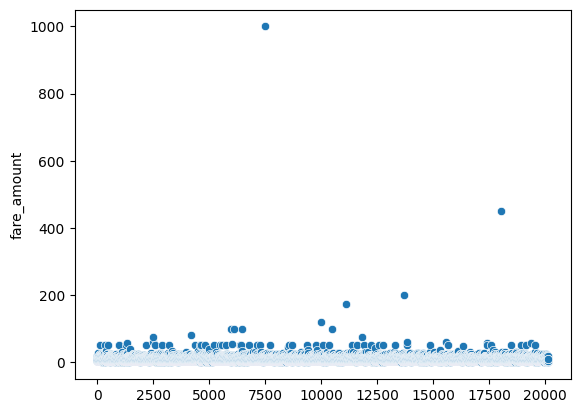

In [57]:
sns.scatterplot(data['fare_amount'])
plt.show()

- fare_amount가 150을 초과할 경우, 150으로 변환

In [ ]:
## case 1

def fare_func(x):
    if x > 150:
        return 150
    else:
        return x
    
data['fare_amount'] = data['fare_amount'].apply(fare_func)

In [62]:
## case 2

data['fare_amount'] = data['fare_amount'].apply(lambda x: 150 if x > 150 else x)

In [63]:
data['fare_amount'].sort_values(ascending=False)

13698    150.00
18002    150.00
11086    150.00
7512     150.00
9988     120.00
          ...  
7880       2.50
12731      2.50
12377      1.00
3593       0.01
12657      0.01
Name: fare_amount, Length: 20122, dtype: float64

- tip_amount의 scatter plot 그리기

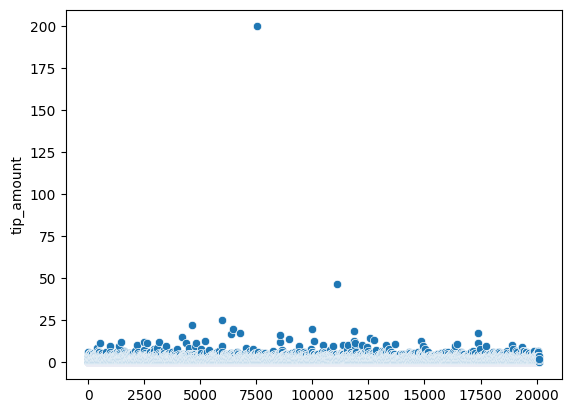

In [64]:
sns.scatterplot(data['tip_amount'])
plt.show()

- tip_amount의 이상치 확인

In [65]:
tip_q1 = np.percentile(data['tip_amount'], 25)
tip_q2 = np.percentile(data['tip_amount'], 50)
tip_q3 = np.percentile(data['tip_amount'], 75)
tip_iqr = tip_q3 - tip_q1

tip_lower = tip_q1 - tip_iqr*1.5
tip_higher = tip_q3 + tip_iqr*1.5

- tip_amount의 이상치 제거

In [67]:
data = data.loc[ (data['tip_amount']>tip_lower)&(data['tip_amount']<tip_higher) , : ]
data = data.reset_index(drop=True)
data

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
0,Pamela Duffy,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,Debit Card,6,3.34,13.0,2.76,0.0
1,Michelle Foster,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,Debit Card,1,1.80,16.0,4.00,0.0
2,Tina Combs,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,Debit Card,1,1.00,6.5,1.45,0.0
3,Brianna Johnson,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,Debit Card,1,4.37,16.5,0.00,0.0
4,Justin Smith,03/25/2017 8:34:11 PM,03/25/2017 8:42:11 PM,Debit Card,6,2.30,9.0,2.06,0.0
...,...,...,...,...,...,...,...,...,...
19908,Patrick Williams,08/10/2017 10:20:04 PM,08/10/2017 10:29:31 PM,Cash,1,0.89,7.5,1.76,0.0
19909,Austin Johnson,02/24/2017 5:37:23 PM,02/24/2017 5:40:39 PM,Cash,3,0.61,4.0,0.00,0.0
19910,Drew Graves,09/04/2017 2:54:14 PM,09/04/2017 2:58:22 PM,Debit Card,1,0.42,4.5,0.00,0.0
19911,Jonathan Copeland,07/15/2017 12:56:30 PM,07/15/2017 1:08:26 PM,Debit Card,1,2.36,10.5,1.70,0.0


- tolls_amount의 scatter plot 그리기

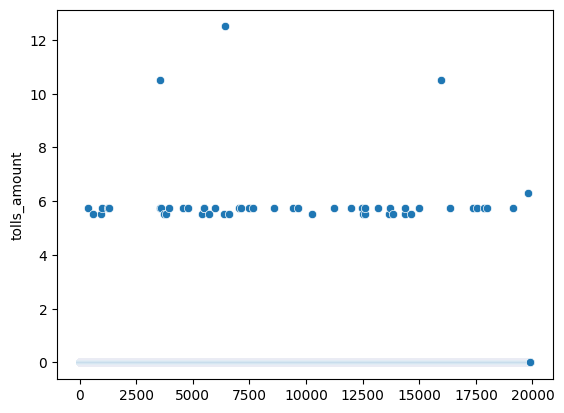

In [68]:
sns.scatterplot(data['tolls_amount'])
plt.show()

### 범주형 데이터 전처리

- payment_method의 값 Debit Card와 Credit Card를 Card로 통합

In [70]:
data['payment_method'].unique()

array(['Debit Card', 'Cash', 'Credit Card'], dtype=object)

In [71]:
data['payment_method'].nunique()

3

In [72]:
data['payment_method'].value_counts()

payment_method
Cash           9828
Debit Card     5086
Credit Card    4999
Name: count, dtype: int64

In [73]:
data['payment_method'] = data['payment_method'].replace({'Debit Card': 'Card',
                                                         'Credit Card': 'Card',
                                                         })

In [74]:
data['payment_method'].value_counts()

payment_method
Card    10085
Cash     9828
Name: count, dtype: int64

- passenger_name 컬럼의 성과 이름을 분리하여 성 부분만 passenger_first_name 컬럼에 저장

In [76]:
data['passenger_first_name'] = data['passenger_name'].str.split(expand=True)[0]

In [77]:
data.head()

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,passenger_first_name
0,Pamela Duffy,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,Card,6,3.34,13.0,2.76,0.0,Pamela
1,Michelle Foster,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,Card,1,1.80,16.0,4.00,0.0,Michelle
2,Tina Combs,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,Card,1,1.00,6.5,1.45,0.0,Tina
3,Brianna Johnson,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,Card,1,4.37,16.5,0.00,0.0,Brianna
4,Justin Smith,03/25/2017 8:34:11 PM,03/25/2017 8:42:11 PM,Card,6,2.30,9.0,2.06,0.0,Justin


- tpep_pickup_datetime 컬럼의 object 자료형을 datetime 자료형으로 변환
- tpep_dropoff_datetime 컬럼의 object 자료형을 datetime 자료형으로 변환

In [78]:
data['tpep_pickup_datetime'] = pd.to_datetime(data['tpep_pickup_datetime'])
data['tpep_dropoff_datetime'] = pd.to_datetime(data['tpep_dropoff_datetime'])

In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19913 entries, 0 to 19912
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   passenger_name         19913 non-null  object        
 1   tpep_pickup_datetime   19913 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  19913 non-null  datetime64[ns]
 3   payment_method         19913 non-null  object        
 4   passenger_count        19913 non-null  int64         
 5   trip_distance          19913 non-null  float64       
 6   fare_amount            19913 non-null  float64       
 7   tip_amount             19913 non-null  float64       
 8   tolls_amount           19913 non-null  float64       
 9   passenger_first_name   19913 non-null  object        
dtypes: datetime64[ns](2), float64(4), int64(1), object(3)
memory usage: 1.5+ MB


- 하차 시각과 승차 시각의 차이를 travel_time 컬럼으로 저장

In [80]:
data['travel_time'] = data['tpep_dropoff_datetime'] - data['tpep_pickup_datetime']

- travel_time 컬럼의 데이터를 초 단위로 변환

In [81]:
data['travel_time'] = data['travel_time'].dt.seconds

### Feature Engneering

- 승객이 지불한 총 요금을 total_amount 컬럼에 저장

In [82]:
data['total_amount'] = data['fare_amount'] + data['tip_amount'] + data['tolls_amount']

- fare_amount와 trip_distance 간의 관계를 scatter plot으로 그리기

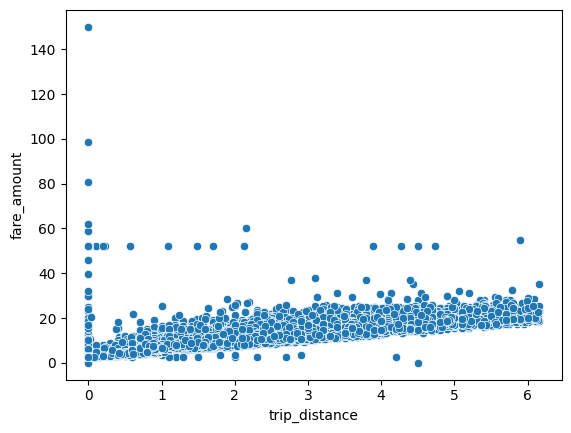

In [83]:
sns.scatterplot(data=data, x='trip_distance', y='fare_amount')
plt.show()

- fare_amount와 travel_time 간의 관계를 scatter plot으로 그리기

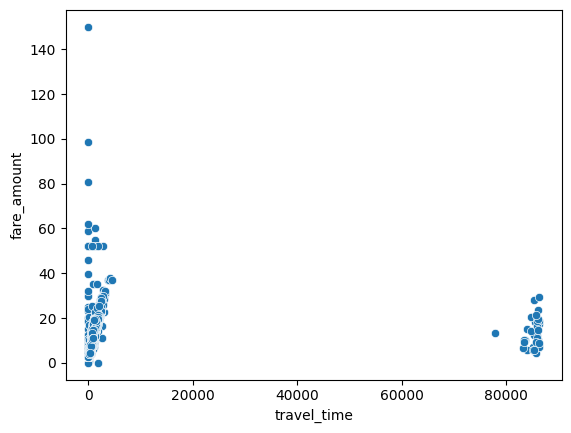

In [84]:
sns.scatterplot(data=data, x='travel_time', y='fare_amount')
plt.show()

- trip_distance와 travel_time 간의 관계를 scatter plot으로 그리기

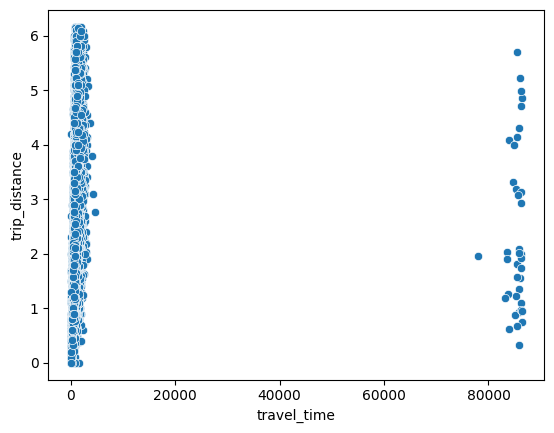

In [85]:
sns.scatterplot(data=data, x='travel_time', y='trip_distance')
plt.show()

- scatter plot으로 관찰된 travel_time의 이상치 제거

In [86]:
time_q1 = np.percentile(data['travel_time'], 25)
time_q2 = np.percentile(data['travel_time'], 50)
time_q3 = np.percentile(data['travel_time'], 75)
time_iqr = time_q3 - time_q1

time_lower = time_q1 - time_iqr*1.5  ## 어차피 0보다 아래의 값은 없다...
time_higher = time_q3 + time_iqr*1.5

data = data.loc[ data['travel_time']<time_higher , : ]
data = data.reset_index(drop=True)

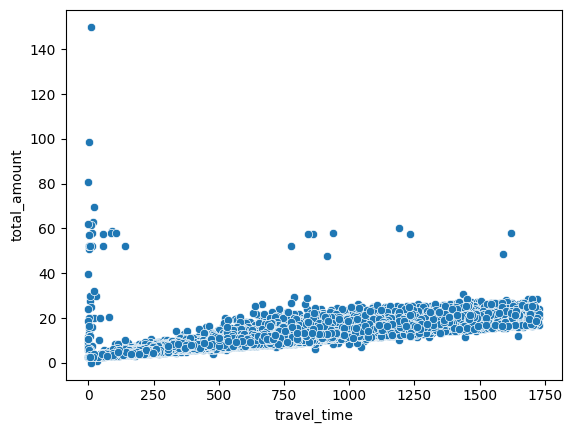

In [87]:
sns.scatterplot(data=data, x='travel_time', y='total_amount')
plt.show()